# Seaborn 막대 그래프
- 가장 기본이 되는 막대 그래프 함수인 .barplot()의 세부 사용법

### 1. 데이터 준비

#### 1) 패키지 참조

In [2]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, concat

#### 2) 데이터 가져오기

In [3]:
성적표df = read_excel('https://data.hossam.kr/D01/grade.xlsx', index_col='이름')
성적표df

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
혜민,4,여자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,4,남자,91,90,89,80


#### 3) 데이터 전처리

In [4]:
df = 성적표df.astype({'학년': 'category', 
                   '성별': 'category'})  # category = finite list of text values
df.dtypes

학년    category
성별    category
국어       int64
영어       int64
수학       int64
과학       int64
dtype: object

#### 4) 그래프 전역 설정

In [5]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

### 2. 막대 그래프 그리기

#### 1) 기본 사용 방법
- .barplot() 함수는 기본적으로 집계가 완료된 데이터를 시각화 함
- x축에 지정된 항목이 중복되지 않는다면 각 집단별 집계결과를 표시

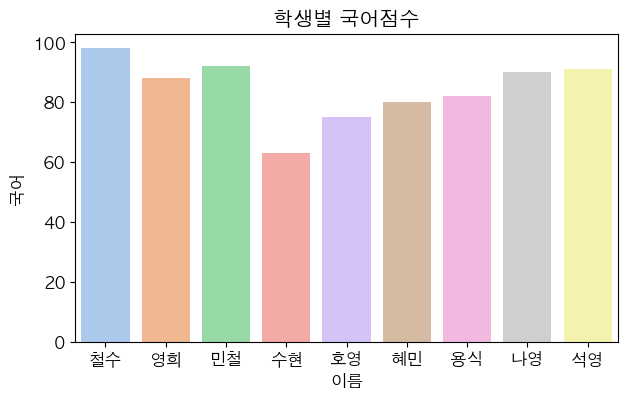

In [6]:
sb.barplot(data=df, x=df.index, y='국어', palette='pastel')
plt.title ('학생별 국어점수')
plt.show()
plt.close()

#### 2) 평균 막대 그래프
- `x축에 중복된 값`이 있을 시 `y축은 평균값`을 표시
- 그래프에 표시되는 막대는 `95% 신뢰구간`을 의미
- `신뢰구간` 변경시 `errorbar = ('ci', 70)` 형식으로 파라미터 설정
- `표준편차` 표현시 `errorbar = sd` 라고 설정

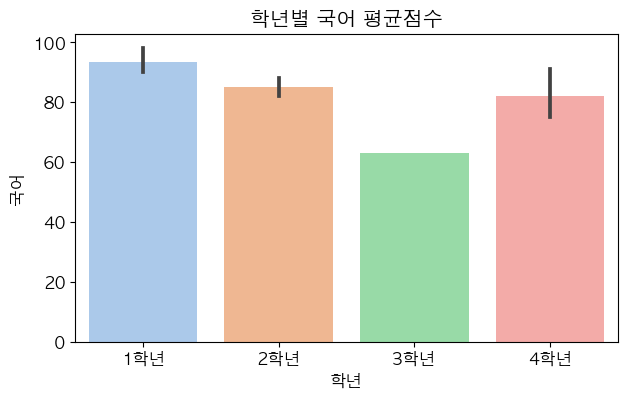

In [9]:
sb.barplot(data=df, x='학년', y = '국어', palette = 'pastel', errorbar = ('ci', 98))
plt.title ('학년별 국어 평균점수')
plt.xticks([0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])
plt.show()
plt.close()

#### 3) 다른 지표 적용하기
- `.barplot()` 함수에 `estimator` 파라미터를 적용하면 다른 지표 표시 가능

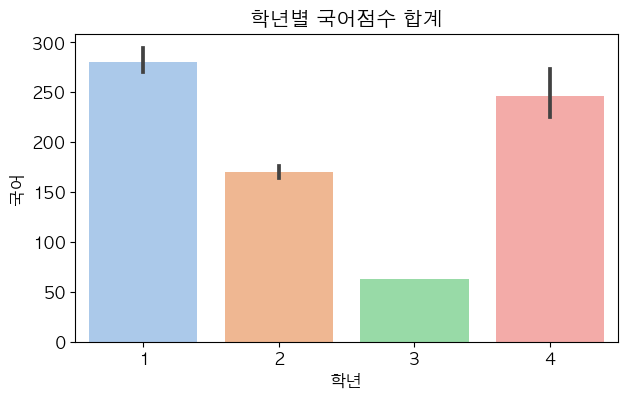

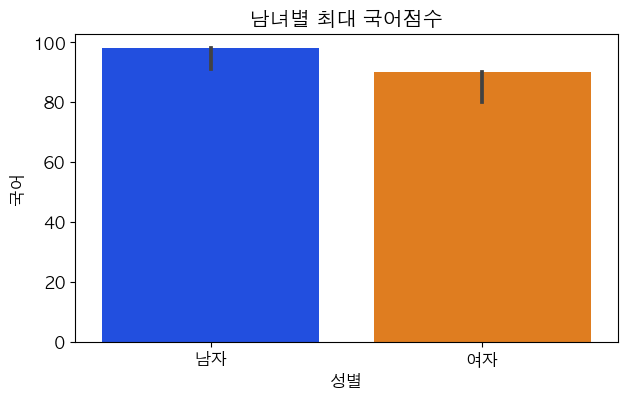

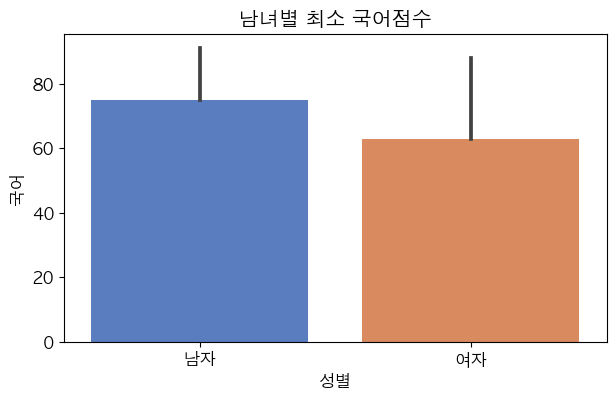

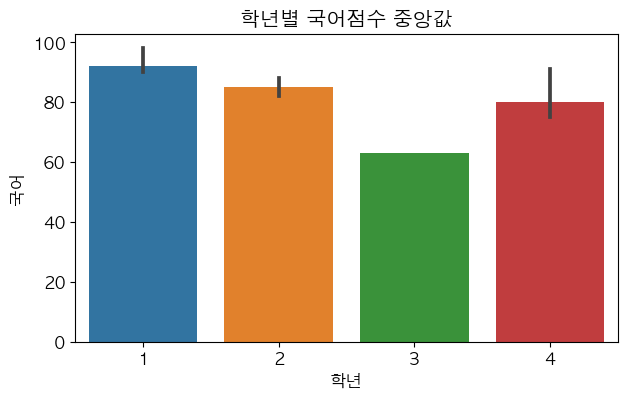

In [10]:
# 합계
sb.barplot(data = df, x = '학년', y = '국어', estimator = 'sum', palette = 'pastel')
plt.title('학년별 국어점수 합계')
plt.show()
plt.close()

# 최대값
sb.barplot(data = df, x = '성별', y = '국어', estimator = 'max', palette = 'bright')
plt.title('남녀별 최대 국어점수')
plt.show()
plt.close()

# 최소값
sb.barplot(data = df, x = '성별', y = '국어', estimator = 'min', palette = 'muted')
plt.title('남녀별 최소 국어점수')
plt.show()
plt.close()

# 중앙값: 데이터를 순서대로 나열한 후 가운데 위치한 값
sb.barplot(data=df, x='학년', y='국어', estimator='median')
plt.title('학년별 국어점수 중앙값')
plt.show()
plt.close()

### 3. 범주에 따른 구분
- `hue` 파라미터 적용

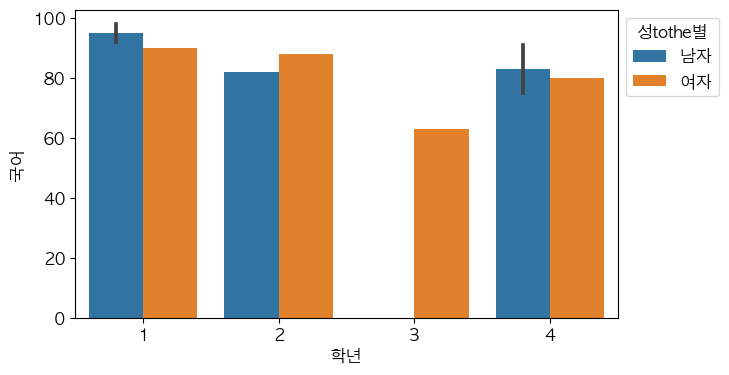

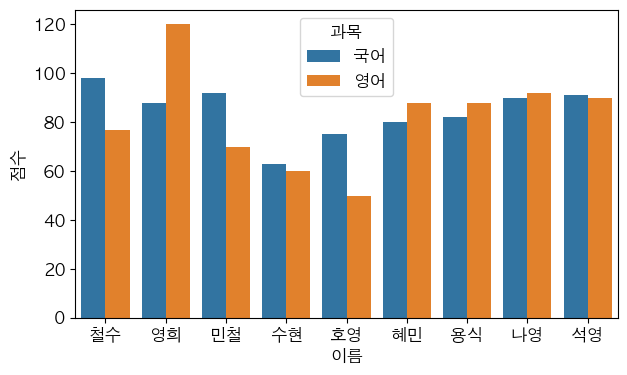

In [14]:
sb.barplot(data = df, x = '학년', y = '국어', hue = '성별', estimator = 'median')
plt.legend(bbox_to_anchor = (1,1), title = '성tothe별') # 범주 위치 옮기기, 범주 제목 설정
plt.show()
plt.close()

# 범주 적용을 위한 데이터 재배치
df1 = df.filter(['국어']).rename(columns = {'국어': '점수'})
df1['과목'] = '국어'

df2 = df.filter(['영어']).rename(columns = {'영어': '점수'})
df2['과목'] = '영어'

df3 = concat([df1, df2])
df3

sb.barplot(data = df3, x=df3.index, y='점수', hue='과목')
plt.show()
plt.close()


### 4. 수평 막대 그래프
- x축과 y축을 바꿔 설정하고 `orient='h'` 파라미터 추가

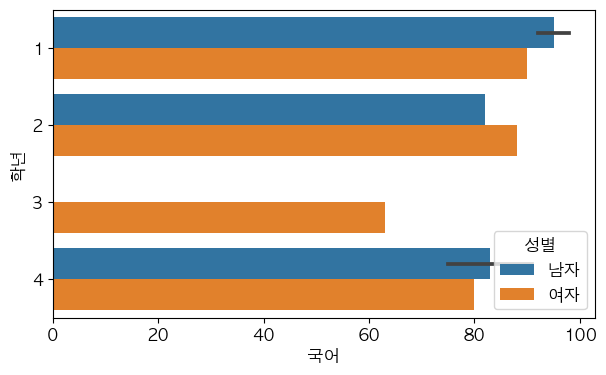

In [11]:
sb.barplot(data=df, x='국어', y='학년', hue='성별', orient='h')
plt.show()
plt.close()